In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from PIL import Image

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# **Data loading & preprocessing**

---


In [7]:
path_train = '/Users/Shadow/Desktop/Projet Machine Vision/counting/train/images/'
path_test = '/Users/Shadow/Desktop/Projet Machine Vision/counting/val/images/'

labels_train = pd.read_csv('counting/train/train_ground_truth.txt')
labels_train = labels_train['count']

labels_val = pd.read_csv('counting/val/val_ground_truth.txt')
labels_val = labels_val['count']


# convert this 1D array to 2D array
train_labels = np.expand_dims(labels_train, axis=1)
val_labels = np.expand_dims(labels_val, axis=1)

In [3]:
print(val_labels.size)

3395


Images loading

In [4]:
train_images = np.empty([64595, 32, 32, 3], dtype=np.uint8)
val_images = np.empty([3395, 32, 32, 3], dtype=np.uint8)


In [5]:
#train image

for i in range (0,64594):

  image_name = path_train + 'images_' + "%05d" % i + '.png'
  
  image_i = Image.open(image_name)

  #resize image
  new_image = image_i.resize((32, 32))

  #conv array
  array_image = img_to_array(new_image)

  train_images[i, :, :, :] = array_image

    

In [8]:
#val images

for i in range (0,3395):

  image_name = path_test + 'images_' + "%05d" % i + '.png'
  
  image_i = Image.open(image_name)

  #resize image
  new_image = image_i.resize((32, 32))

  #conv array
  array_image = img_to_array(new_image)

  val_images[i, :, :, :] = array_image

#normalize to between 0 and 1



verify data

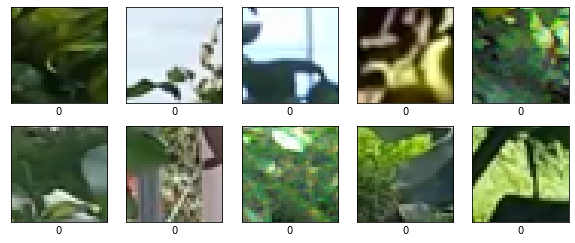

In [9]:
train_images, val_images = train_images / 255.0, val_images / 255.0



class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, :, :, :], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


**CNN bitch**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

**Compile and train**

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
2019/2019 [==============================] - 38s 19ms/step - loss: 1.1648 - accuracy: 0.5336 - val_loss: 0.9014 - val_accuracy: 0.6389
Epoch 2/10
2019/2019 [==============================] - 38s 19ms/step - loss: 0.7203 - accuracy: 0.7289 - val_loss: 0.6502 - val_accuracy: 0.7573
Epoch 3/10
2019/2019 [==============================] - 37s 18ms/step - loss: 0.5236 - accuracy: 0.8064 - val_loss: 0.5037 - val_accuracy: 0.8186
Epoch 4/10
2019/2019 [==============================] - 37s 18ms/step - loss: 0.4135 - accuracy: 0.8499 - val_loss: 0.4576 - val_accuracy: 0.8342
Epoch 5/10
2019/2019 [==============================] - 37s 19ms/step - loss: 0.3417 - accuracy: 0.8777 - val_loss: 0.4043 - val_accuracy: 0.8619
Epoch 6/10
2019/2019 [==============================] - 37s 18ms/step - loss: 0.2923 - accuracy: 0.8966 - val_loss: 0.4080 - val_accuracy: 0.8663
Epoch 7/10
2019/2019 [==============================] - 37s 19ms/step - loss: 0.2531 - accuracy: 0.9095 - val_loss: 0.3509 -

**Evaluate the model**

107/107 - 0s - loss: 0.3652 - accuracy: 0.8922


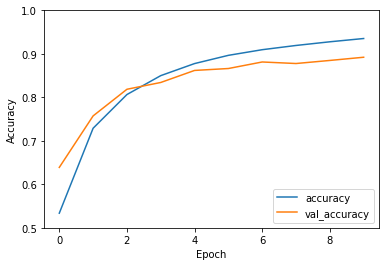

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val_images,  val_labels, verbose=2)

In [16]:
print(test_acc)

0.892194390296936


In [17]:
model.save('R1_version_1.h5')